**Induction Machines**<br>
An experiment done in a laboratory that measures the Line Current, Real Power, Apparent Power and Speed for different values of Torque in a induction motor.<br>
Power Factor, Output Power and Efficiency are computed in Excel before being imported into Jupyter Lab for exploration and visualisation

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
file_loc = 'Star and Delta.xlsx'
star_sheet = 'Part 1'
delta_sheet = 'Part2'

star_conn = pd.read_excel(file_loc, sheet_name=star_sheet, header=2)
star_conn['Type'] = 'Star'

delta_conn = pd.read_excel(file_loc, sheet_name=delta_sheet, header=2)
delta_conn['Type'] = 'Delta'

star_delta = pd.concat([star_conn, delta_conn], ignore_index=True)

In [3]:
star_conn.head()

,Line Current (A),3 Phase Wattmeter (kW),3 Phase Apparent Power (KVA),Power Factor (cos q),Torque (Nm),Speed (rpm),Output Power (W),Efficiency (%),Type
0,0.273,0.2214,0.3278,0.675412,0.1,2991,31.321679,14.147100,Star
1,0.284,0.2675,0.3414,0.783538,0.2,2976,62.329198,23.300635,Star
2,0.302,0.3106,0.3630,0.855647,0.3,2961,93.022558,29.949311,Star
3,0.327,0.3580,0.3920,0.913265,0.4,2942,123.234208,34.422963,Star
4,0.358,0.4081,0.4291,0.951060,0.5,2921,152.943202,37.476893,Star


In [4]:
delta_conn.head()

,Line Current (A),3 Phase Wattmeter (kW),3 Phase Apparent Power (KVA),Power Factor (cos q),Torque (Nm),Speed (rpm),Output Power (W),Efficiency (%),Type
0,0.465,0.2066,0.3205,0.644618,0.1,2996,31.374039,15.185885,Delta
1,0.481,0.2544,0.3316,0.767189,0.2,2977,62.350142,24.508704,Delta
2,0.511,0.2990,0.3517,0.850156,0.3,2959,92.959727,31.090210,Delta
3,0.556,0.3485,0.3822,0.911826,0.4,2939,123.108544,35.325264,Delta
4,0.611,0.3987,0.4191,0.951324,0.5,2919,152.838483,38.334207,Delta


In [5]:
star_delta.head()

,Line Current (A),3 Phase Wattmeter (kW),3 Phase Apparent Power (KVA),Power Factor (cos q),Torque (Nm),Speed (rpm),Output Power (W),Efficiency (%),Type
0,0.273,0.2214,0.3278,0.675412,0.1,2991,31.321679,14.147100,Star
1,0.284,0.2675,0.3414,0.783538,0.2,2976,62.329198,23.300635,Star
2,0.302,0.3106,0.3630,0.855647,0.3,2961,93.022558,29.949311,Star
3,0.327,0.3580,0.3920,0.913265,0.4,2942,123.234208,34.422963,Star
4,0.358,0.4081,0.4291,0.951060,0.5,2921,152.943202,37.476893,Star


In [6]:
# sns.pairplot(star_delta, hue='Type')
# plt.savefig('trial.jpg')

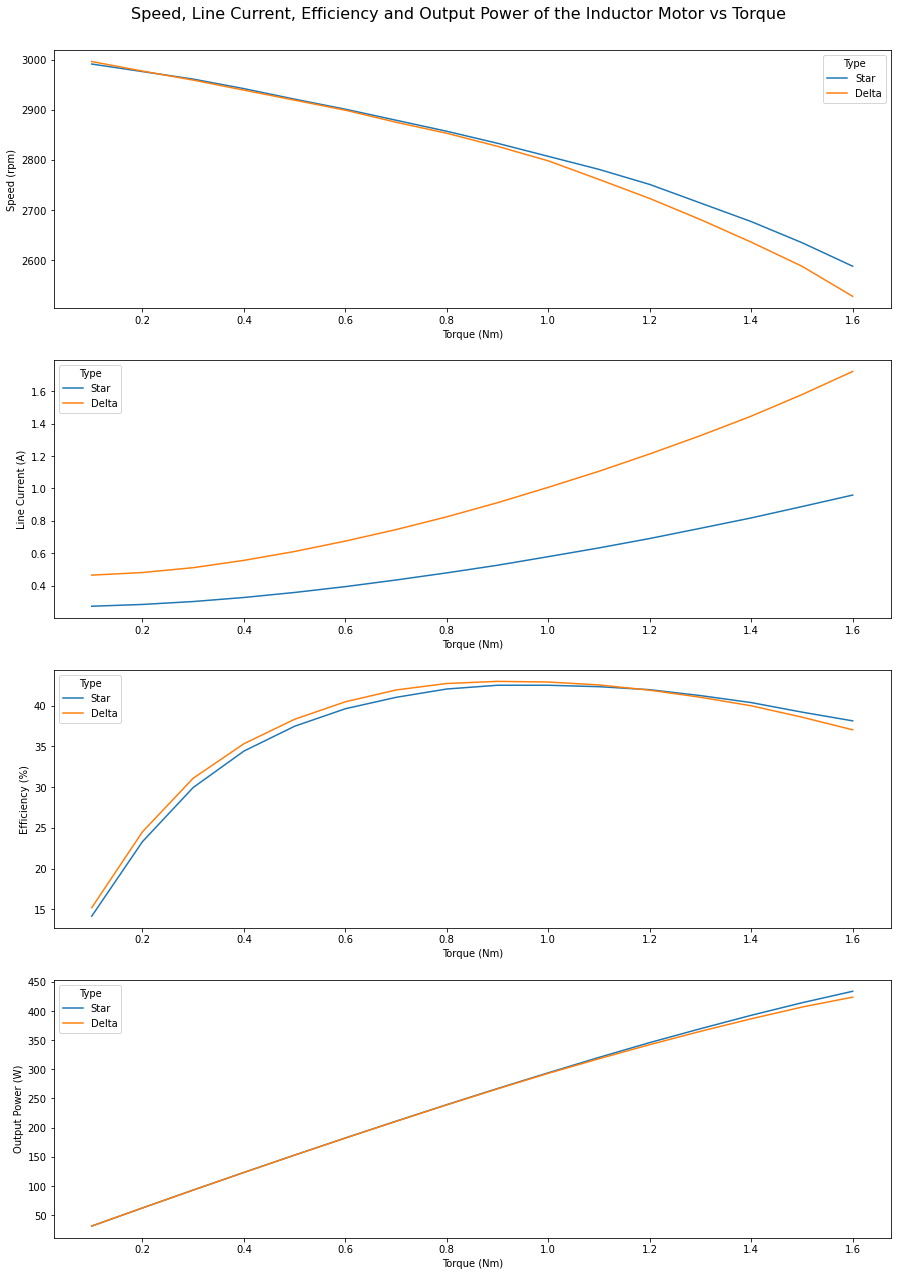

In [7]:
figure, axes = plt.subplots(4, 1, figsize=(15, 20))
figure.suptitle('Speed, Line Current, Efficiency and Output Power of the Inductor Motor vs Torque', fontsize=16)

sns.lineplot(x = 'Torque (Nm)', y = 'Speed (rpm)' ,data = star_delta, hue='Type', ax=axes[0])
sns.lineplot(x = 'Torque (Nm)', y = 'Line Current (A)', data = star_delta, hue='Type',ax = axes[1])
sns.lineplot(x = 'Torque (Nm)', y = 'Efficiency (%)', data = star_delta, hue='Type', ax = axes[2])
sns.lineplot(x = 'Torque (Nm)', y = 'Output Power (W)', data = star_delta, hue='Type', ax = axes[3])

plt.subplots_adjust(top=0.95)
# plt.savefig('torque.jpg')

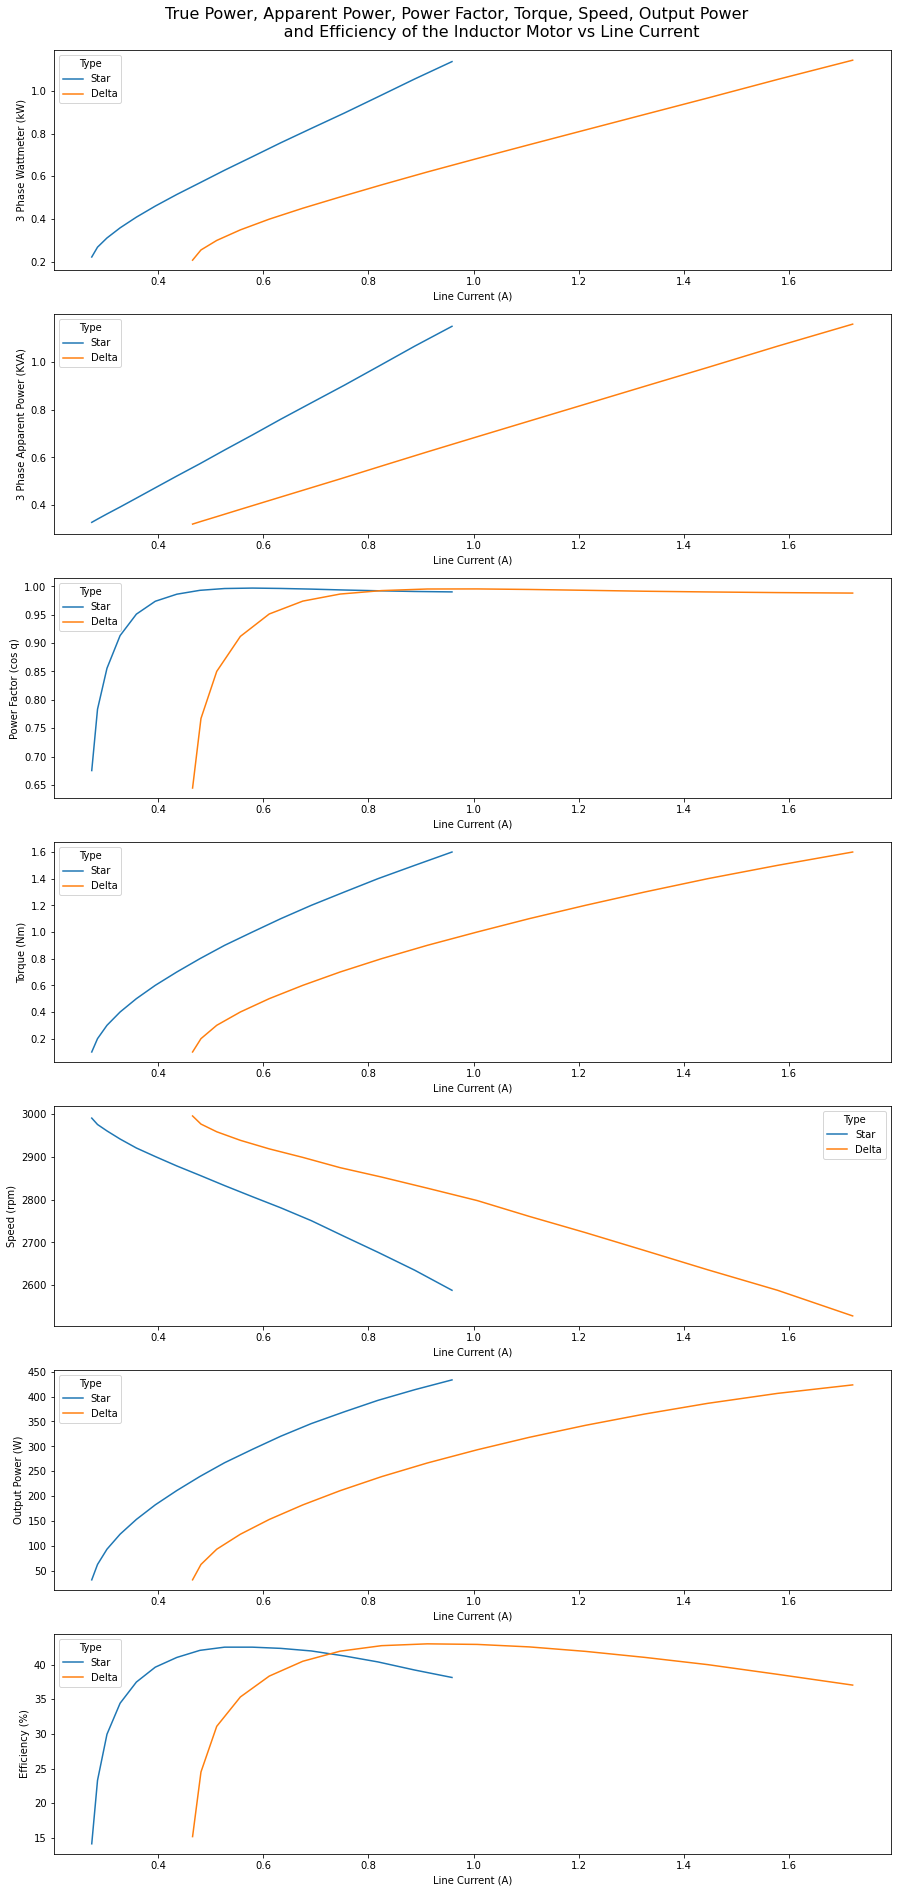

In [8]:
figure, axes = plt.subplots(7, 1, figsize=(15, 30))
figure.suptitle('''True Power, Apparent Power, Power Factor, Torque, Speed, Output Power 
             and Efficiency of the Inductor Motor vs Line Current''', fontsize=16)

sns.lineplot(x = 'Line Current (A)', y = '3 Phase Wattmeter (kW)', data = star_delta, hue='Type',ax = axes[0])
sns.lineplot(x = 'Line Current (A)', y = '3 Phase Apparent Power (KVA)', data = star_delta, hue='Type',ax = axes[1])
sns.lineplot(x = 'Line Current (A)', y = 'Power Factor (cos q)', data = star_delta, hue='Type',ax = axes[2])
sns.lineplot(x = 'Line Current (A)', y = 'Torque (Nm)', data = star_delta, hue='Type',ax = axes[3])
sns.lineplot(x = 'Line Current (A)', y = 'Speed (rpm)', data = star_delta, hue='Type',ax = axes[4])
sns.lineplot(x = 'Line Current (A)', y = 'Output Power (W)', data = star_delta, hue='Type',ax = axes[5])
sns.lineplot(x = 'Line Current (A)', y = 'Efficiency (%)', data = star_delta, hue='Type',ax = axes[6])

plt.subplots_adjust(top=0.96)
# plt.savefig('line_current.jpg')

In [9]:
to_check = ['Speed (rpm)', 'Line Current (A)', 'Efficiency (%)']

print('Minimum values')
for value in range(len(to_check)):
    print(f'{to_check[value]} -> Star: {star_conn[to_check[value]].min()}, Delta: {delta_conn[to_check[value]].min()}')

print('\nMaximum values')
for value in range(len(to_check)):
    print(f'{to_check[value]} -> Star: {star_conn[to_check[value]].max()}, Delta: {delta_conn[to_check[value]].max()}')


Minimum values
Speed (rpm) -> Star: 2588, Delta: 2528
Line Current (A) -> Star: 0.273, Delta: 0.465
Efficiency (%) -> Star: 14.147099709254848, Delta: 15.1858851083495

Maximum values
Speed (rpm) -> Star: 2991, Delta: 2996
Line Current (A) -> Star: 0.959, Delta: 1.722
Efficiency (%) -> Star: 42.509785006941016, Delta: 42.987814287020065
